
___

<div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 24px; font-weight: bold;">
Experimentació amb gran conjunt de casos
  </span>
</div>


___

Aquesta fase experimental té com a objectiu observar el comportament del sistema en relació amb la seva eficàcia a mesura que s'amplia significativament l'espai de casos. Aquestes dades són essencials per a la comprensió del comportament del sistema en un entorn més ampli i per a l'avaluació de com respon davant d'una major diversitat de casos. 

Aquesta anàlisi permetrà obtenir conclusions significatives sobre l'escalabilitat i la robustesa del sistema enfront de diferents escenaris.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import streamlit as st
from cbr_edited import CBR 
import time
from Functions import *


<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 20px; font-weight: bold;">
1.  Pujem les dades Extended
  </span>
</div>
</div>



In [2]:
casos_usuaris = pd.read_csv('../Ontologia/Experimentation_Dataframes/Cases_extended.csv')
casos_usuaris_2 = pd.read_csv('../Ontologia/Cases.csv')
casos_usuaris = pd.concat([casos_usuaris, casos_usuaris_2, casos_usuaris], ignore_index=True)
users = pd.read_csv('../Ontologia/Experimentation_Dataframes/Users_extended.csv')
usuaris_2 = pd.read_csv('../Ontologia/Users.csv')
users = pd.concat([users, usuaris_2], ignore_index=True)
dataframe_llibres = pd.read_csv('../Ontologia/Books.csv')
dataframe_llibres['num_lectures'] = [len(casos_usuaris[casos_usuaris['id_llibre'].isin([dataframe_llibres['id_llibre'][i]])]) for i in range(len(dataframe_llibres))]


In [3]:
casos_usuaris

,id_usuari,id_llibre,score,genere_persona,any_naixement,pref_adaptacio_peli,pref_best_seller,pref_tipus_lectura,pref_sagues,comprat,...,Ficció,Comèdia,Històrica,Fantasia,Ciència,Creixement personal,Policiaca,Juvenil,pagines_max,Idioma
0,0,4,4.90,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
1,0,16,4.85,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
2,0,43,4.45,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
3,0,84,4.70,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
4,0,97,4.50,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{'Anglès', 'Català'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,151,2,3.00,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"
1490,151,16,3.00,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"
1491,151,32,5.00,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"
1492,151,45,4.00,Dona,1971,Si,No,Fluida,No,No,...,0,0,1,0,0,1,1,0,150,"{'Espanyol', 'Català', 'Francès'}"


In [4]:
casos_usuaris.describe()

,id_usuari,id_llibre,score,any_naixement,Ciència Ficció,Romàntic,Ficció,Comèdia,Històrica,Fantasia,Ciència,Creixement personal,Policiaca,Juvenil,pagines_max
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1.494000e+03
mean,77.930388,51.648594,4.610736,1980.283133,0.485274,0.447122,0.453146,0.376841,0.465863,0.350736,0.300535,0.350736,0.445783,0.307229,2.844736e+07
std,42.229072,30.639517,0.361097,18.212544,0.499950,0.497363,0.497967,0.484757,0.499000,0.477360,0.458644,0.477360,0.497218,0.461500,4.513118e+07
min,0.000000,0.000000,1.000000,1943.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+02
25%,45.000000,26.000000,4.500000,1964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+02
50%,77.000000,50.000000,4.650000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+02
75%,114.000000,77.000000,4.750000,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08
max,151.000000,106.000000,5.000000,2011.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08


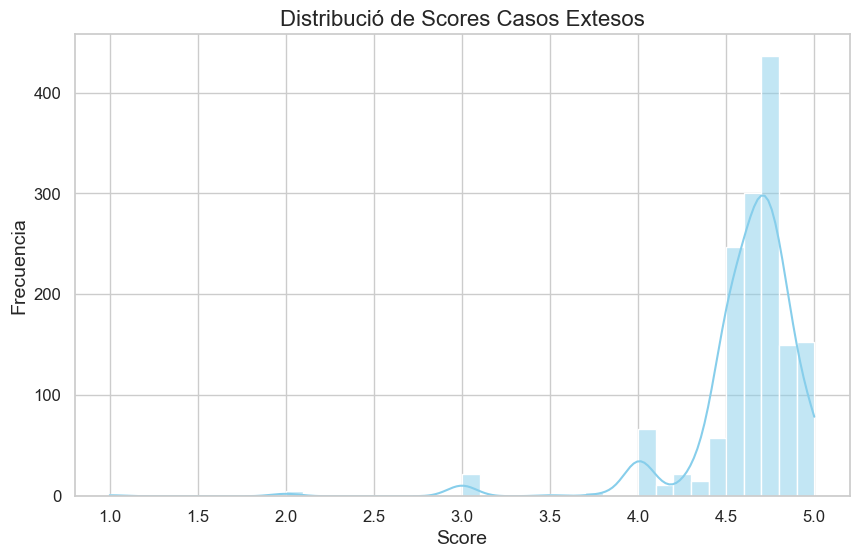

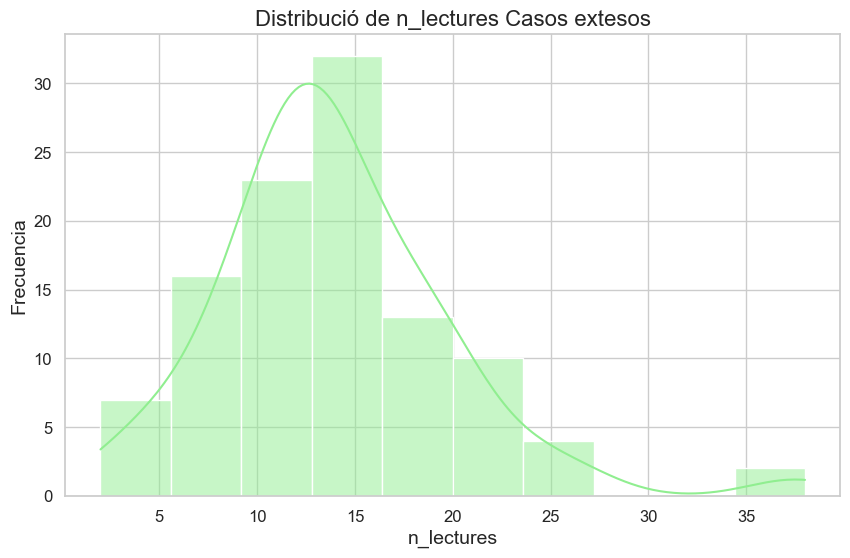

In [7]:
# Gràfic per visualitzar distribució de score per INICIALITZACIÓ
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(casos_usuaris['score'], kde=True, color='skyblue', bins=40)

# Personalizar el gráfico
plt.title('Distribució de Scores Casos Extesos', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()


# Gràfic per visualitzar distribució de score per INICIALITZACIÓ
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(dataframe_llibres['num_lectures'], kde=True, color='lightgreen', bins=10)

# Personalizar el gráfico
plt.title('Distribució de n_lectures Casos extesos', fontsize=16)
plt.xlabel('n_lectures', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-info" style="color: #0277BD; background-color: #E1F5FE;">

La taula proporciona estadístiques descriptives del conjunt de dades utilitzat per a l'experiment, que inclou les següents columnes:

- **id_usuari:** Identificador de l'usuari.
- **id_llibre:** Identificador del llibre.
- **score:** Puntuació associada a la recomanació.
- **any_naixement:** Any de naixement de l'usuari.
- **Ciència Ficció, Romàntic, Ficció, Comèdia, Històrica, Fantasia, Ciència, Creixement personal, Policiaca, Juvenil:** Columnes binàries que indiquen la preferència de l'usuari per diversos gèneres literaris.
- **pagines_max:** Número màxim de pàgines preferit per l'usuari.

Aquestes estadístiques ofereixen una visió general de la distribució i la variabilitat del conjunt de dades.
+ Els sistema presentat només disposa de **60** casos. Ara treballarem amb **1488** casos per observar la degardació en realitzar una recomanació random.
    
</div>

<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 20px; font-weight: bold;">
2.  Experimentem amb els casos
  </span>
</div>
</div>



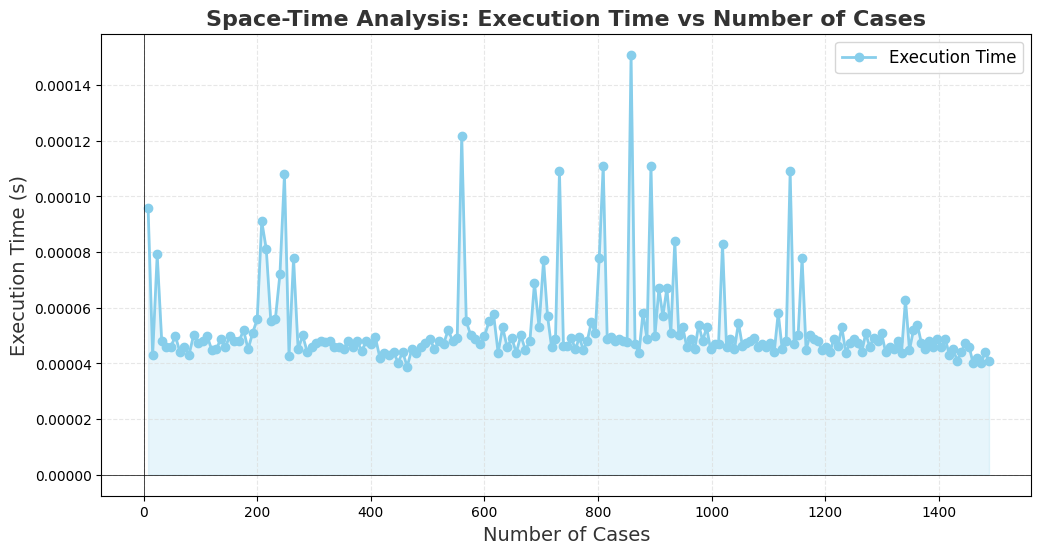

In [28]:
# Dividim les dades en batchs
partes_cases = np.array_split(casos_usuaris, 200)
partes_users = np.array_split(users, 200)

# Store execution times and the number of cases for each accumulation of batches
execution_times = []
number_of_cases = []  # To store the number of cases after each accumulation
accumulated_cases = pd.DataFrame()
accumulated_users = pd.DataFrame()

for i in range(200):
    # Accumulate cases and users up to the current batch
    accumulated_cases = pd.concat([accumulated_cases, partes_cases[i]])
    accumulated_users = pd.concat([accumulated_users, partes_users[i]])
    number_of_cases.append(len(accumulated_cases))  # Store the total number of cases accumulated

    # Instantiate the CBR class with accumulated cases and users
    dt_instance = DecisionTree()
    dt = dt_instance.load("Decision_Tree")
    cbr_instance = CBR(accumulated_cases, accumulated_users, dt)

    # Define the attributes for the retrieve function
    ex_attributes_for_retrieve = {'any_naixement': '>= 2003', 'genere_persona': 'Dona', 'Romàntic': 1, 'Ciència Ficció': 0, 'Comèdia': 0, 'Històrica': 0, 'Ficció': 0, 'Fantasia': 0, 'Ciència': 0, 
                           'Creixement personal': 1, 'Policiaca': 0, 'Juvenil': 0, 'idioma': "{'Anglès', 'Alemany', 'Català'}", 
                           'pref_adaptacio_peli': 'Si', 'pref_best_seller': 'Si', 'pref_sagues': 'Si',
                           'pref_tipus_lectura': 'Fluida', 'pagines_max': 350, 'id_usuari': 2}

    # Measure the execution time of retrieve
    start_time = time.time()
    cbr_instance.retrieve(ex_attributes_for_retrieve)
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(12, 6))

# Using a pastel color and adding a grid for better readability
plt.plot(number_of_cases, execution_times, marker='o', linestyle='-', color='#87CEEB', linewidth=2)

# Customizing the plot with titles and labels
plt.xlabel('Number of Cases', fontsize=14, color='#333333')
plt.ylabel('Execution Time (s)', fontsize=14, color='#333333')
plt.title('Space-Time Analysis: Execution Time vs Number of Cases', fontsize=16, fontweight='bold', color='#333333')
plt.grid(True, linestyle='--', color='#DDDDDD', alpha=0.7)
plt.legend(['Execution Time'], loc='upper right', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.fill_between(number_of_cases, execution_times, color='#87CEEB', alpha=0.2)

# Show plot
plt.show()